In [1]:
import pandas as pd
from pyproj import Transformer
import requests
from owslib.wms import WebMapService
from eomaps import Maps
import matplotlib
#matplotlib.use("qt5agg")

%matplotlib widget

In [2]:
df = pd.read_excel('pniewy_rozbitek3.xlsx',sheet_name='wysokosci')
df = df[['numer','X', 'Y']]
df

,numer,X,Y
0,ow-p21,5.580652e+06,5.821888e+06
1,ow-p23,5.578450e+06,5.823076e+06
2,ow-p24,5.578447e+06,5.823084e+06
3,ow-p27,5.576675e+06,5.823817e+06
4,ow-p30,5.575597e+06,5.824354e+06
5,ow-p31,5.575619e+06,5.824348e+06
6,ow-p34,5.574477e+06,5.824943e+06
7,ow-p35,5.574492e+06,5.824973e+06
8,ow-p36,5.574497e+06,5.824977e+06
9,ow-p37,5.574512e+06,5.824988e+06


In [3]:
# Some of the most common coordinate systems in Poland:
# 1992                  EPSG:2180
# 2000 strefa 5         EPSG:2176
# 2000 strefa 6         EPSG:2177
# 2000 strefa 7         EPSG:2178
# 2000 strefa 8         EPSG:2179
# WGS84                 EPSG:4326
# WGS 1984 Web Mercator EPSG:3857
# ETRS 1989 LCC         EPSG:3034
# ETRS 1989 LAEA        EPSG:3035
# ETRS89                EPSG:4258

results = []
for index, row in df.iterrows():
    x = row['Y']
    y = row['X']
    transformer = Transformer.from_crs("epsg:2176", "epsg:2180") # second value is always 2180, first need to be adjusted to your data
    x, y = transformer.transform(x, y)
    url = f'https://services.gugik.gov.pl/nmt/?request=GetHByXY&x={x}&y={y}'
    response = requests.get(url)
    if response.status_code != 200:
        results.append({"Nazwa": row['numer'], 'Y': row['Y'], 'X': row['X'] ,"wysokosc": f'Error: {response.status_code}'})
        continue
    height = response.json()
    results.append({"Nazwa": row['numer'], 'Y': row['Y'], 'X': row['X'] ,"wysokosc": height})
    print(f"{row['numer']}: {height}")

output = pd.DataFrame(results)
    
#pd.DataFrame(results).to_excel('Odwierty_heights.xlsx')
    


ow-p21: 95
ow-p23: 94.5
ow-p24: 94.3
ow-p27: 99.2
ow-p30: 98.1
ow-p31: 98.3
ow-p34: 87.1
ow-p35: 87.6
ow-p36: 87.1
ow-p37: 88.1
ow-p39: 82


In [3]:
df = pd.read_excel('wspolrzedne.xlsx',sheet_name='Sheet1')
df = df[['Oznaczenie','X_2000', 'Y_2000']]
df

,Oznaczenie,X_2000,Y_2000
0,OW-3-1,5.563196e+06,5.826338e+06
1,OW-3-10,5.563499e+06,5.826307e+06
2,OW-3-11,5.563552e+06,5.826302e+06
3,OW-3-12,5.563532e+06,5.826369e+06
4,OW-3-13,5.563546e+06,5.826349e+06
...,...,...,...
104,OW-3-M7,5.563714e+06,5.826523e+06
105,OW-3-M7A,5.563705e+06,5.826539e+06
106,OW-3-M8,5.563720e+06,5.826514e+06
107,OW-3-M8A,5.563732e+06,5.826493e+06


In [9]:
# Some of the most common coordinate systems in Poland:
# 1992                  EPSG:2180
# 2000 strefa 5         EPSG:2176
# 2000 strefa 6         EPSG:2177
# 2000 strefa 7         EPSG:2178
# 2000 strefa 8         EPSG:2179
# WGS84                 EPSG:4326
# WGS 1984 Web Mercator EPSG:3857
# ETRS 1989 LCC         EPSG:3034
# ETRS 1989 LAEA        EPSG:3035
# ETRS89                EPSG:4258

### coordinates to google maps link

results = []
for index, row in df.iterrows():
    x = row['Y_2000']
    y = row['X_2000']
    transformer = Transformer.from_crs("epsg:2176", "epsg:4326") # second value is always 2180, first need to be adjusted to your data
    x, y = transformer.transform(x, y)
    url = f'https://www.google.com/maps/search/?api=1&query={x}%2C{y}'

    results.append({"Nazwa": row['Oznaczenie'], 'Y_2000': row['Y_2000'], 'X_2000': row['X_2000'] ,"y_wgs 1984":y,"x_wgs 1984":x,"link": url})


output = pd.DataFrame(results)

print(output)
    
pd.DataFrame(results).to_excel('wynik.xlsx')

        Nazwa        Y_2000        X_2000  y_wgs 1984  x_wgs 1984  \
0      OW-3-1  5.826338e+06  5.563196e+06   15.932078   52.566494   
1     OW-3-10  5.826307e+06  5.563499e+06   15.936527   52.566177   
2     OW-3-11  5.826302e+06  5.563552e+06   15.937307   52.566128   
3     OW-3-12  5.826369e+06  5.563532e+06   15.937032   52.566732   
4     OW-3-13  5.826349e+06  5.563546e+06   15.937232   52.566549   
..        ...           ...           ...         ...         ...   
104   OW-3-M7  5.826523e+06  5.563714e+06   15.939750   52.568090   
105  OW-3-M7A  5.826539e+06  5.563705e+06   15.939610   52.568240   
106   OW-3-M8  5.826514e+06  5.563720e+06   15.939826   52.568008   
107  OW-3-M8A  5.826493e+06  5.563732e+06   15.940011   52.567816   
108   OW-3-M9  5.826597e+06  5.563957e+06   15.943345   52.568733   

                                                  link  
0    https://www.google.com/maps/search/?api=1&quer...  
1    https://www.google.com/maps/search/?api=1&quer...  


In [4]:
pd.DataFrame.from_dict(results).to_excel('Pniewy-Rozbitek3_wysokosci.xlsx')

In [3]:
## just for testing

transfomer = Transformer.from_crs("epsg:2176", "epsg:2180")
transformed = transfomer.transform(5825459.3893, 5557779.2058) # Y first, X second, return x, y
transformed[0], transformed[1]
respone = requests.get(f'https://services.gugik.gov.pl/nmt/?request=GetHByXY&x={transformed[0]}&y={transformed[1]}')
respone.json()
# df.apply(lambda row: transfomer.transform(row['Y'], row['X']), axis=1, result_type='expand')
# df.head()

62.2

In [5]:
wms = WebMapService("https://mapy.geoportal.gov.pl/wss/service/img/guest/TOPO/MapServer/WMSServer")



In [2]:
wms = WebMapService('https://mapservices.weather.noaa.gov/eventdriven/services/WWA/watch_warn_adv/MapServer/WMSServer?request=GetCapabilities&service=WMS')

In [8]:
wms.identification.type
wms.identification.version
wms.identification.title
wms.identification.abstract
list(wms.contents)

['0', '1']

In [9]:
wms['1'].boundingBox  

(-166.005629, 18.913827, -68.950699, 70.349717, 'EPSG:4326')

In [17]:
img = wms.getmap(layers=['0'], styles=['default'], srs='EPSG:4326', bbox=( -166.005629, 18.913827, -68.950699, 70.349717), size=(1000, 1000), format='image/jpeg', transparent=True)


In [18]:
out = open('mapa_usa.jpg', 'wb')
out.write(img.read())
out.close()

In [10]:
wms['1'].crsOptions

['EPSG:102100', 'EPSG:3857', 'EPSG:4326']

In [11]:
wms['1'].styles

{'default': {'title': 'CurrentWarnings',
  'legend': 'https://mapservices.weather.noaa.gov:443/eventdriven/services/WWA/watch_warn_adv/MapServer/WMSServer?request=GetLegendGraphic%26version=1.1.1%26format=image/png%26layer=1'}}

In [12]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'GetStyles']

In [13]:
wms.getOperationByName('GetCapabilities').methods

[{'type': 'Get',
  'url': 'https://mapservices.weather.noaa.gov:443/eventdriven/services/WWA/watch_warn_adv/MapServer/WMSServer?'}]

In [14]:
wms.getOperationByName('GetMap').formatOptions

['image/bmp',
 'image/jpeg',
 'image/tiff',
 'image/png',
 'image/png8',
 'image/png24',
 'image/png32',
 'image/gif',
 'image/svg+xml']

In [5]:
df['X'][0], df['Y'][0]

(5609001.9413, 5828718.1483)

In [6]:
x = df['Y'][0]
y = df['X'][0]
print(x, y)
transformer = Transformer.from_crs("epsg:2176", "epsg:2180") # second value is always 2180, first need to be adjusted to your data
x_trans, y_trans = transformer.transform(x, y)
print(x_trans, y_trans)
max_y = y_trans + 6000
min_y = y_trans - 6000
min_x = x_trans - 6000
max_x = x_trans + 6000
print(min_x, min_y, max_x, max_y)

5821887.6448 5580652.2874
521311.0836897157 309321.62390128884
515311.0836897157 303321.62390128884 527311.0836897157 315321.62390128884


In [7]:
img = wms.getmap(layers=['Raster'], styles=['default'], srs='EPSG:2180', bbox=( min_y, min_x, max_y, max_x), size=(1000, 1000), format='image/jpeg', transparent=True)


In [23]:
min_y = 299215.4604
max_y = 315837.4641
min_x = 518165.8933
max_x = 527601.1219

img = wms.getmap(layers=['Raster'], styles=['default'], srs='EPSG:2180', bbox=( min_y, min_x, max_y, max_x), size=(2000,1133), format='image/jpeg', transparent=True)


In [8]:
out = open('mapa.jpg', 'wb')
out.write(img.read())
out.close()

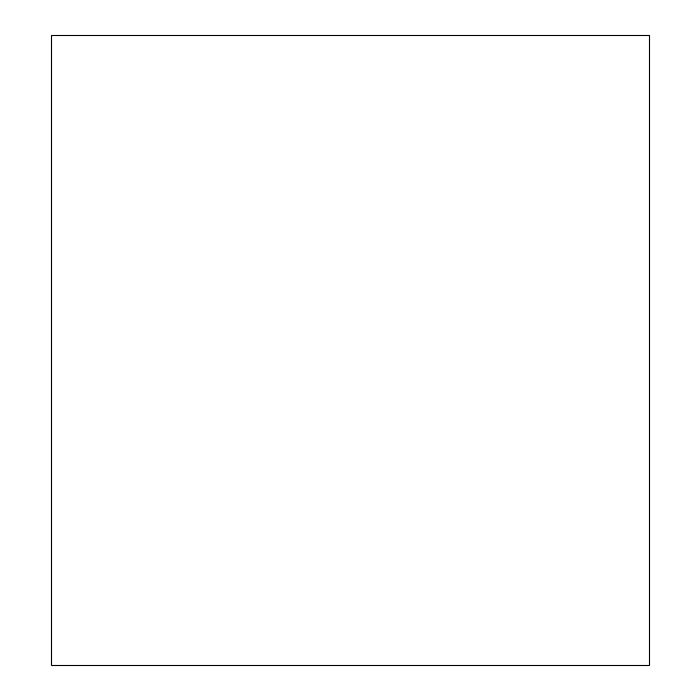

In [65]:
m = Maps(crs=2180, layer="first_layer", figsize=(7,7))
m.set_extent(extents=( min_y, max_y, min_x, max_x), crs=2180) # set the extent of the map

m_data = m.new_layer()
m_data.set_data(output, y='X', x='Y', crs=2180, parameter='wysokosc')

layer = m.add_wms.get_service('http://mapy.geoportal.gov.pl/wss/service/img/guest/TOPO/MapServer/WMSServer?',
                                service_type="wms")['Raster']



m_data.set_shape.geod_circles(radius=10)      # Draw geodesic circles  
m_data.plot_map(vmin=0, ec="k", cmap="magma")  # Plot the data)
layer()

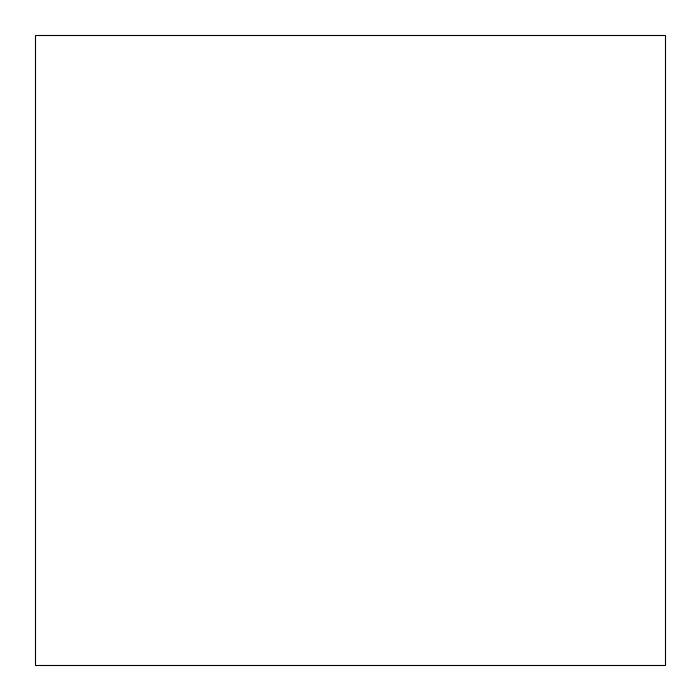

In [ ]:
m.show()                       # show the map
